In [362]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [363]:
raw = pd.read_csv("train_group_day.csv")
raw.head()

,date,day,total_calls
0,2017-01-01,1,8672
1,2017-01-02,2,8324
2,2017-01-03,3,6527
3,2017-01-04,4,6939
4,2017-01-05,5,6904


In [364]:
raw['count']=[i for i in range(1, 700)]

In [365]:
if raw.index.dtype == 'int64':
    raw.set_index('date', inplace=True)
raw.asfreq("D").index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=699, freq='D')

<AxesSubplot:xlabel='date'>

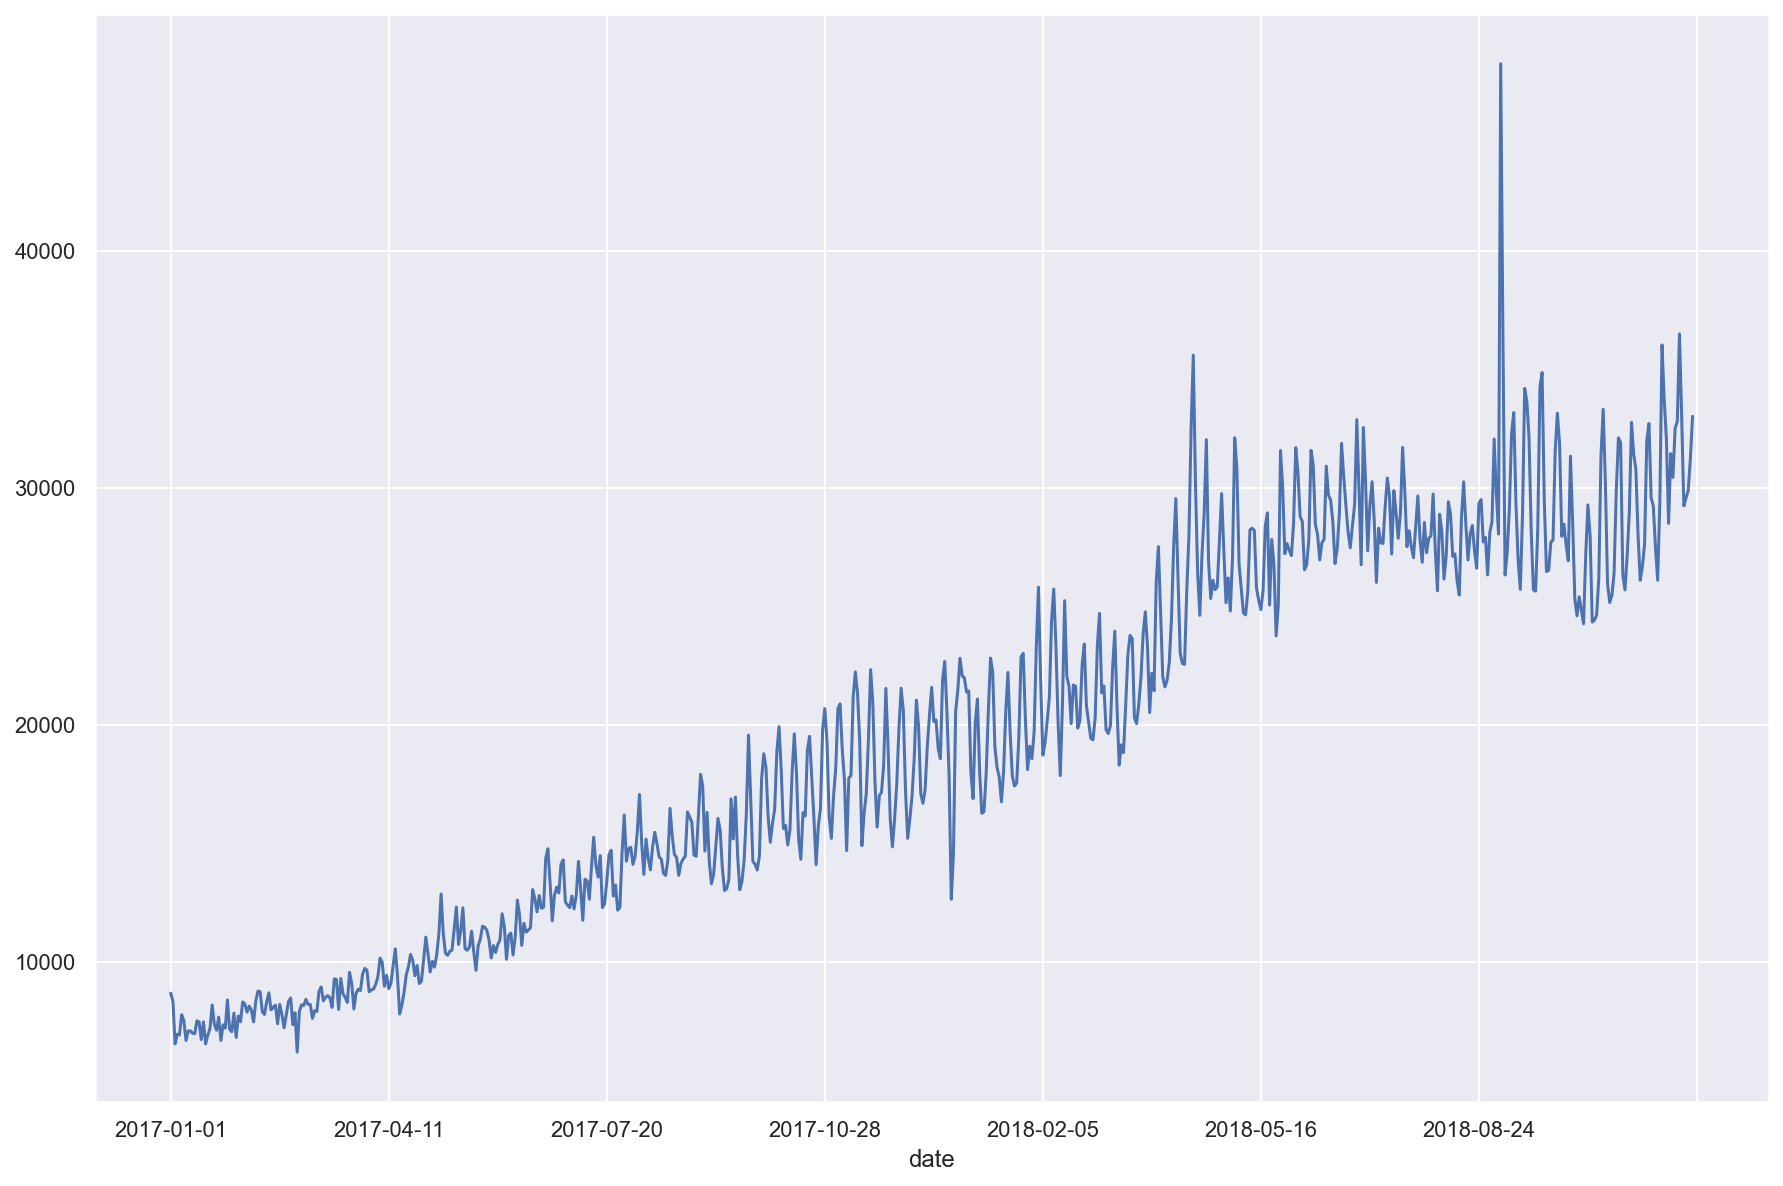

In [366]:
raw["total_calls"].plot()

## Decompose

In [367]:
df

,total_calls
date,
2017-01-01,8672
2017-01-02,8324
2017-01-03,6527
2017-01-04,6939
2017-01-05,6904
...,...
2018-11-26,29245
2018-11-27,29577
2018-11-28,29885


In [358]:
result.seasonal

date
2017-01-01     126.143476
2017-01-02    -502.273552
2017-01-03   -1295.414966
2017-01-04   -1332.263451
2017-01-05    -368.658833
                 ...     
2018-11-26    -502.273552
2018-11-27   -1295.414966
2018-11-28   -1332.263451
2018-11-29    -368.658833
2018-11-30    1681.101629
Freq: D, Name: seasonal, Length: 699, dtype: float64

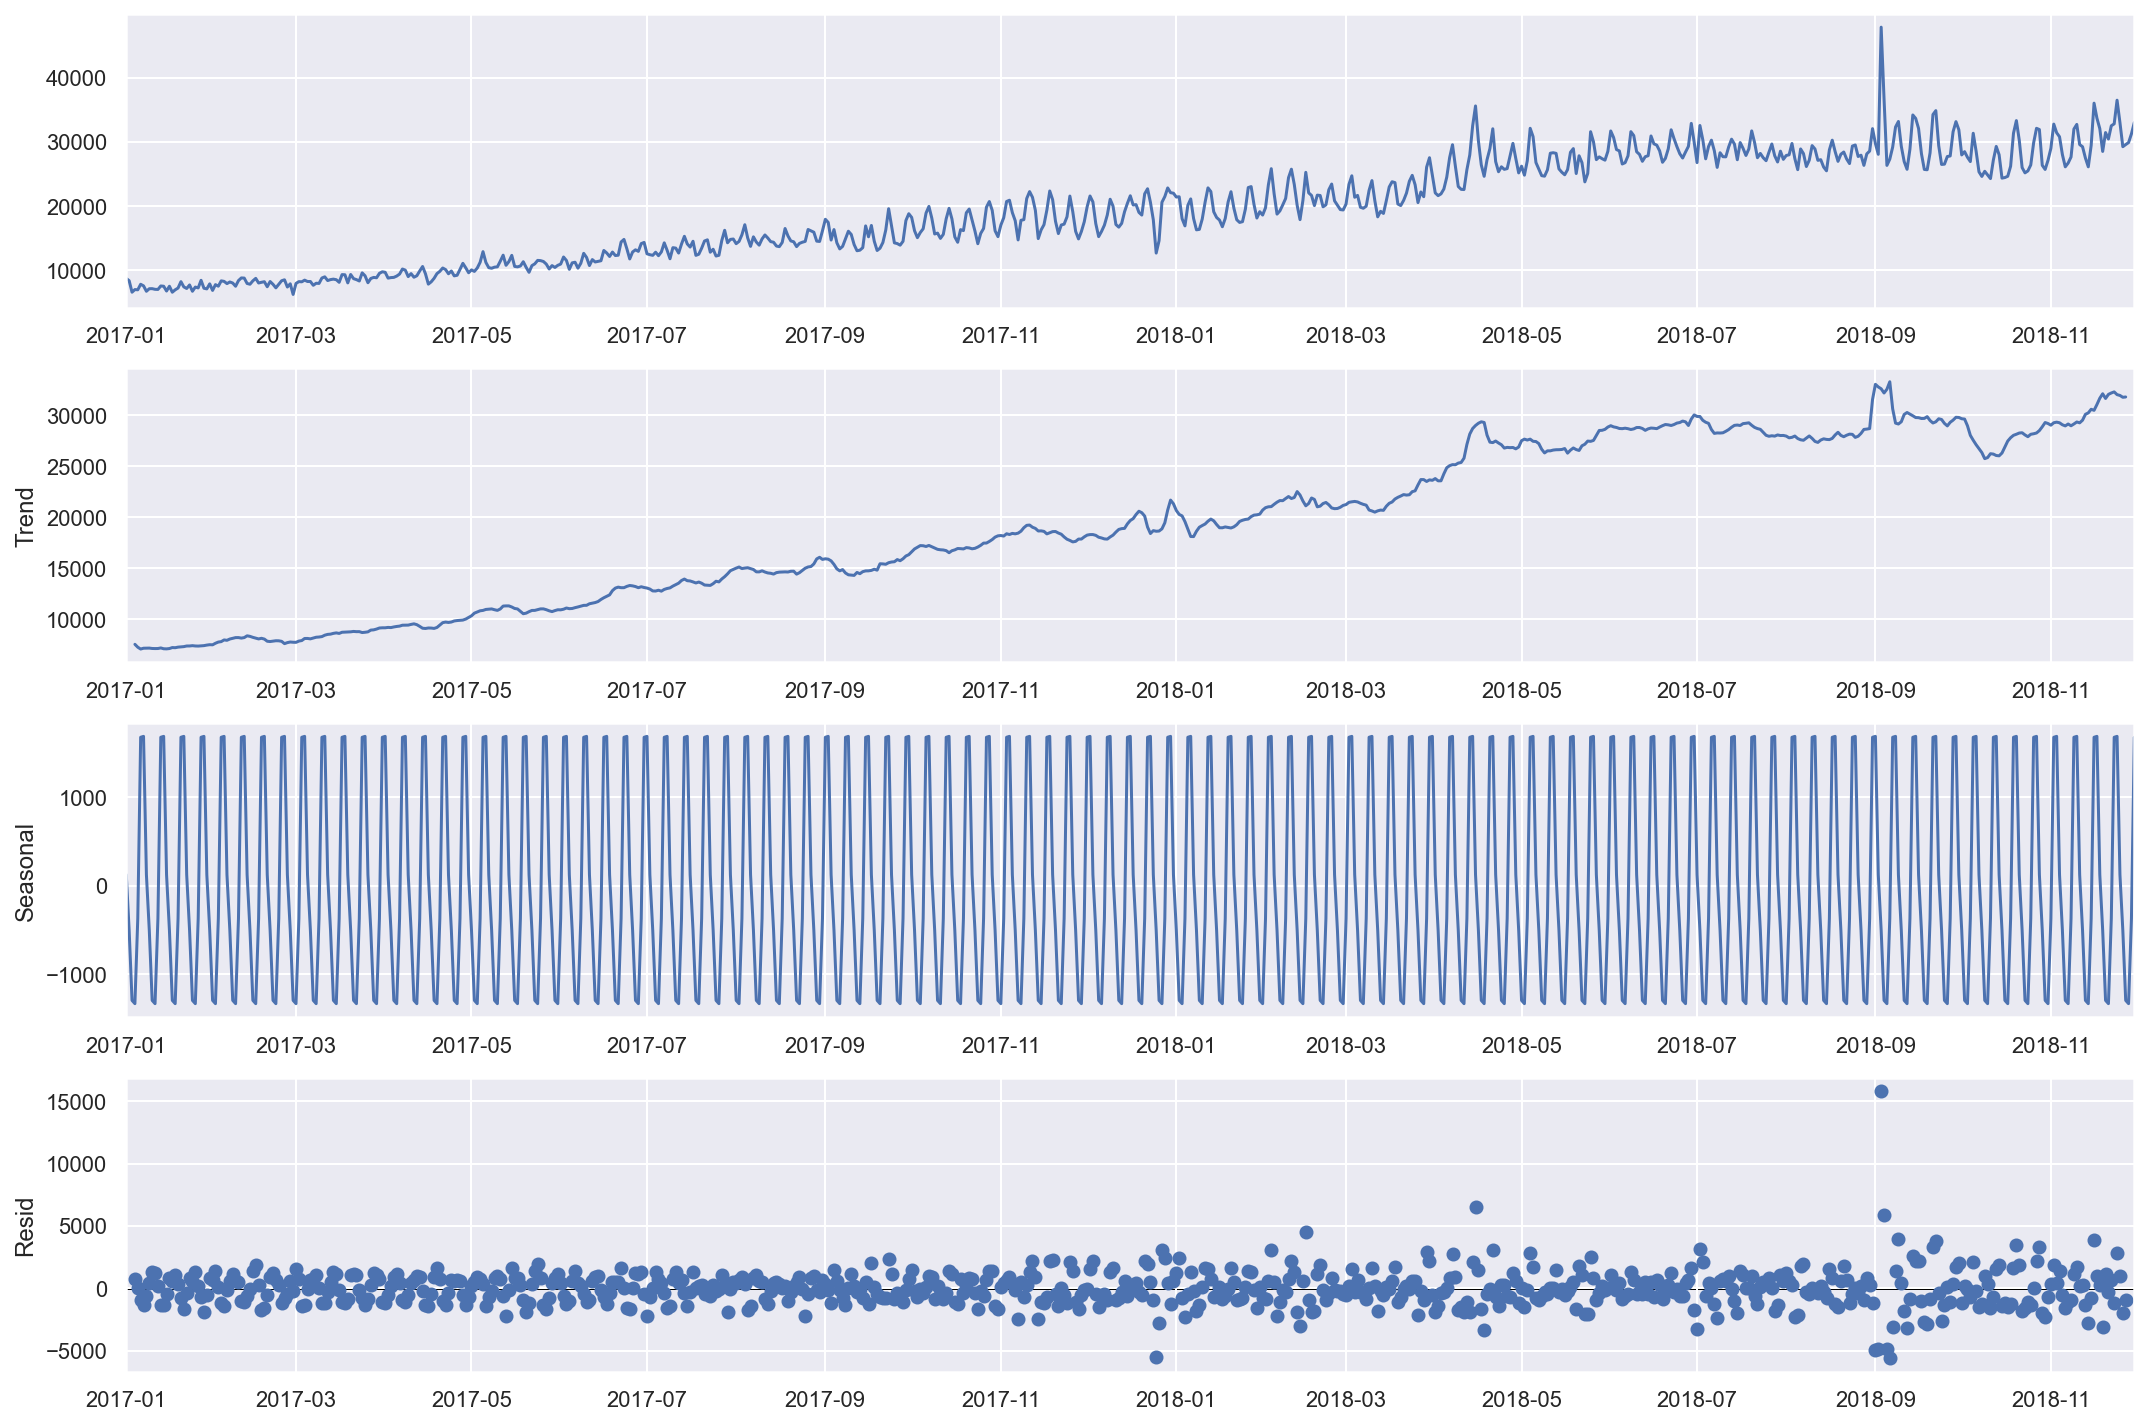

In [370]:
from statsmodels.tsa.seasonal import seasonal_decompose
series =  df
result = seasonal_decompose(series, model='additive')
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

fig = result.plot()
plt.rcParams['figure.figsize'] = [15.0,10.0]

In [373]:
total_calls = raw["total_calls"]
total_calls

date
2017-01-01     8672
2017-01-02     8324
2017-01-03     6527
2017-01-04     6939
2017-01-05     6904
              ...  
2018-11-26    29245
2018-11-27    29577
2018-11-28    29885
2018-11-29    31252
2018-11-30    33026
Name: total_calls, Length: 699, dtype: int64

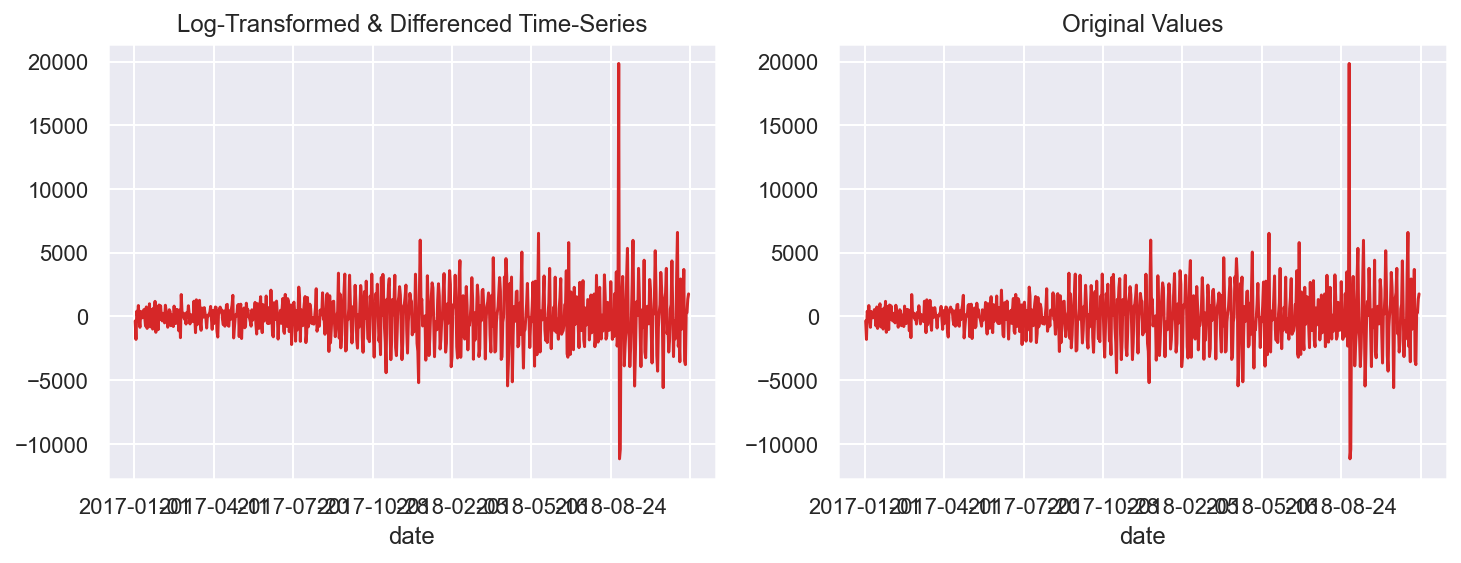

In [375]:

calls_diff = total_calls - total_calls.shift()

ax1 = plt.subplot(121)
calls_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
calls_diff.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [359]:
df.head()

,total_calls
date,
2017-01-01,8672
2017-01-02,8324
2017-01-03,6527
2017-01-04,6939
2017-01-05,6904


In [348]:
df["total_calls"]

date
2017-01-01     8672
2017-01-02     8324
2017-01-03     6527
2017-01-04     6939
2017-01-05     6904
              ...  
2018-11-26    29245
2018-11-27    29577
2018-11-28    29885
2018-11-29    31252
2018-11-30    33026
Freq: D, Name: total_calls, Length: 699, dtype: int64

In [349]:
result.seasonal

date
2017-01-01     126.143476
2017-01-02    -502.273552
2017-01-03   -1295.414966
2017-01-04   -1332.263451
2017-01-05    -368.658833
                 ...     
2018-11-26    -502.273552
2018-11-27   -1295.414966
2018-11-28   -1332.263451
2018-11-29    -368.658833
2018-11-30    1681.101629
Freq: D, Name: seasonal, Length: 699, dtype: float64

In [361]:
df.head()

,total_calls
date,
2017-01-01,8672
2017-01-02,8324
2017-01-03,6527
2017-01-04,6939
2017-01-05,6904


In [376]:
remove_seasonality = pd.DataFrame(df["total_calls"] - result.seasonal)
remove_seasonality.columns = ["remove seasonality"]
remove_seasonality["original_data"] = df["total_calls"]
remove_seasonality["seasonliaty"] = result.seasonal


remove_seasonality.head() 

,remove seasonality,original_data,seasonliaty
date,,,
2017-01-01,8545.856524,8672,126.143476
2017-01-02,8826.273552,8324,-502.273552
2017-01-03,7822.414966,6527,-1295.414966
2017-01-04,8271.263451,6939,-1332.263451
2017-01-05,7272.658833,6904,-368.658833


In [378]:
remove_seasonality.to_csv("remove_seasonliaty.csv", sep=',')

# There seems Trend in this data

- Let's find the trend with linear model(OLS Linear Regression)
- We will make more model with residuals. 

In [299]:
raw_reg = raw.copy()
raw_reg = raw_reg[["total_calls", "count"]]
raw_reg = sm.add_constant(raw_reg)

In [180]:
### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria,:]
    raw_test = raw.loc[raw.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [181]:
X_train_rd, X_test_rd, Y_train_rd, Y_test_rd = datasplit_ts(raw_reg, ["total_calls"], ["count", "const"], '2018-07-01')

# Applying Base Model
fit_reg1_rd = sm.OLS(Y_train_rd, X_train_rd).fit()
display(fit_reg1_rd.summary())
pred_tr_reg1_rd = fit_reg1_rd.predict(X_train_rd.values)
pred_te_reg1_rd = fit_reg1_rd.predict(X_test_rd.values)

Train_size: (546, 3) Test_size: (153, 3)
X_train: (546, 2) Y_train: (546, 1)
X_test: (153, 2) Y_test: (153, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_calls   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     5928.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.08e-294
Time:                        03:01:25   Log-Likelihood:                -4916.2
No. Observations:                 546   AIC:                             9836.
Df Residuals:                     544   BIC:                             9845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
count         41.2305      0.536     76.993      0.000      40.179      42.282
const       5384.4191    169.042     31.852      0.000    5052.363    5716.475
==============================================================================
Omnibus:                       49.708   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.183
Skew:                           0.389   Prob(JB):                     1.22e-34
Kurtosis:                       5.502   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's fit the regression line with all data again to remove the trend. 

In [182]:
X_train_rd, X_test_rd, Y_train_rd, Y_test_rd = datasplit_ts(raw_reg, ["total_calls"], ["count", "const"], '2018-12-01')

# Applying Base Model
fit_reg = sm.OLS(Y_train_rd, X_train_rd).fit()
display(fit_reg1_rd.summary())
trend = fit_reg.predict(X_train_rd) 

Train_size: (699, 3) Test_size: (0, 3)
X_train: (699, 2) Y_train: (699, 1)
X_test: (0, 2) Y_test: (0, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_calls   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     5928.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.08e-294
Time:                        03:01:32   Log-Likelihood:                -4916.2
No. Observations:                 546   AIC:                             9836.
Df Residuals:                     544   BIC:                             9845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
count         41.2305      0.536     76.993      0.000      40.179      42.282
const       5384.4191    169.042     31.852      0.000    5052.363    5716.475
==============================================================================
Omnibus:                       49.708   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.183
Skew:                           0.389   Prob(JB):                     1.22e-34
Kurtosis:                       5.502   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

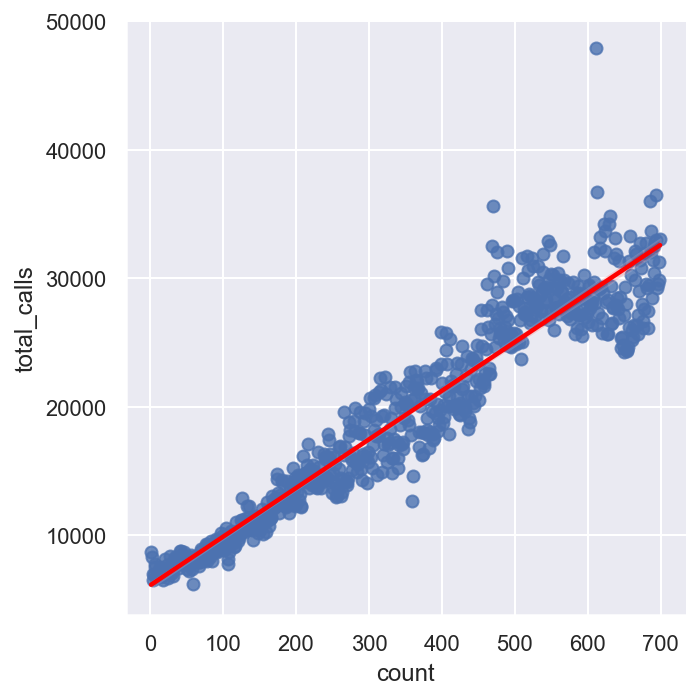

In [183]:
sns.lmplot(x='count', y='total_calls', data=raw, line_kws={'color': 'red'})

## Let's removing Trend(found by linear model), and make more model with residuals.

In [184]:
#new_y = raw["total_calls"] - trend
#new_y.plot()

new_y = fit_reg.resid

In [185]:
### Error analysis
def stationarity_adf_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    return Stationarity_adf

def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss

ADF Test shows 'cannot reject the null hypothesis'. It means "**not stationary**". 

In [186]:
stationarity_adf_test(new_y, [])

,Stationarity_adf
Test Statistics,-2.657082
p-value,0.081764
Used Lag,20.000000
Used Observations,678.000000
Critical Value(1%),-3.440032
Maximum Information Criteria,11830.172333


KPSS Test shows 'cannot reject the null hypothesis'. It means "**stationary**". 

In [187]:
stationarity_kpss_test(new_y, [])

,Stationarity_kpss
Test Statistics,0.354332
p-value,0.096839
Used Lag,9.000000
Critical Value(10%),0.347000


### Now, let's check we can make this residual as stationary data with difference

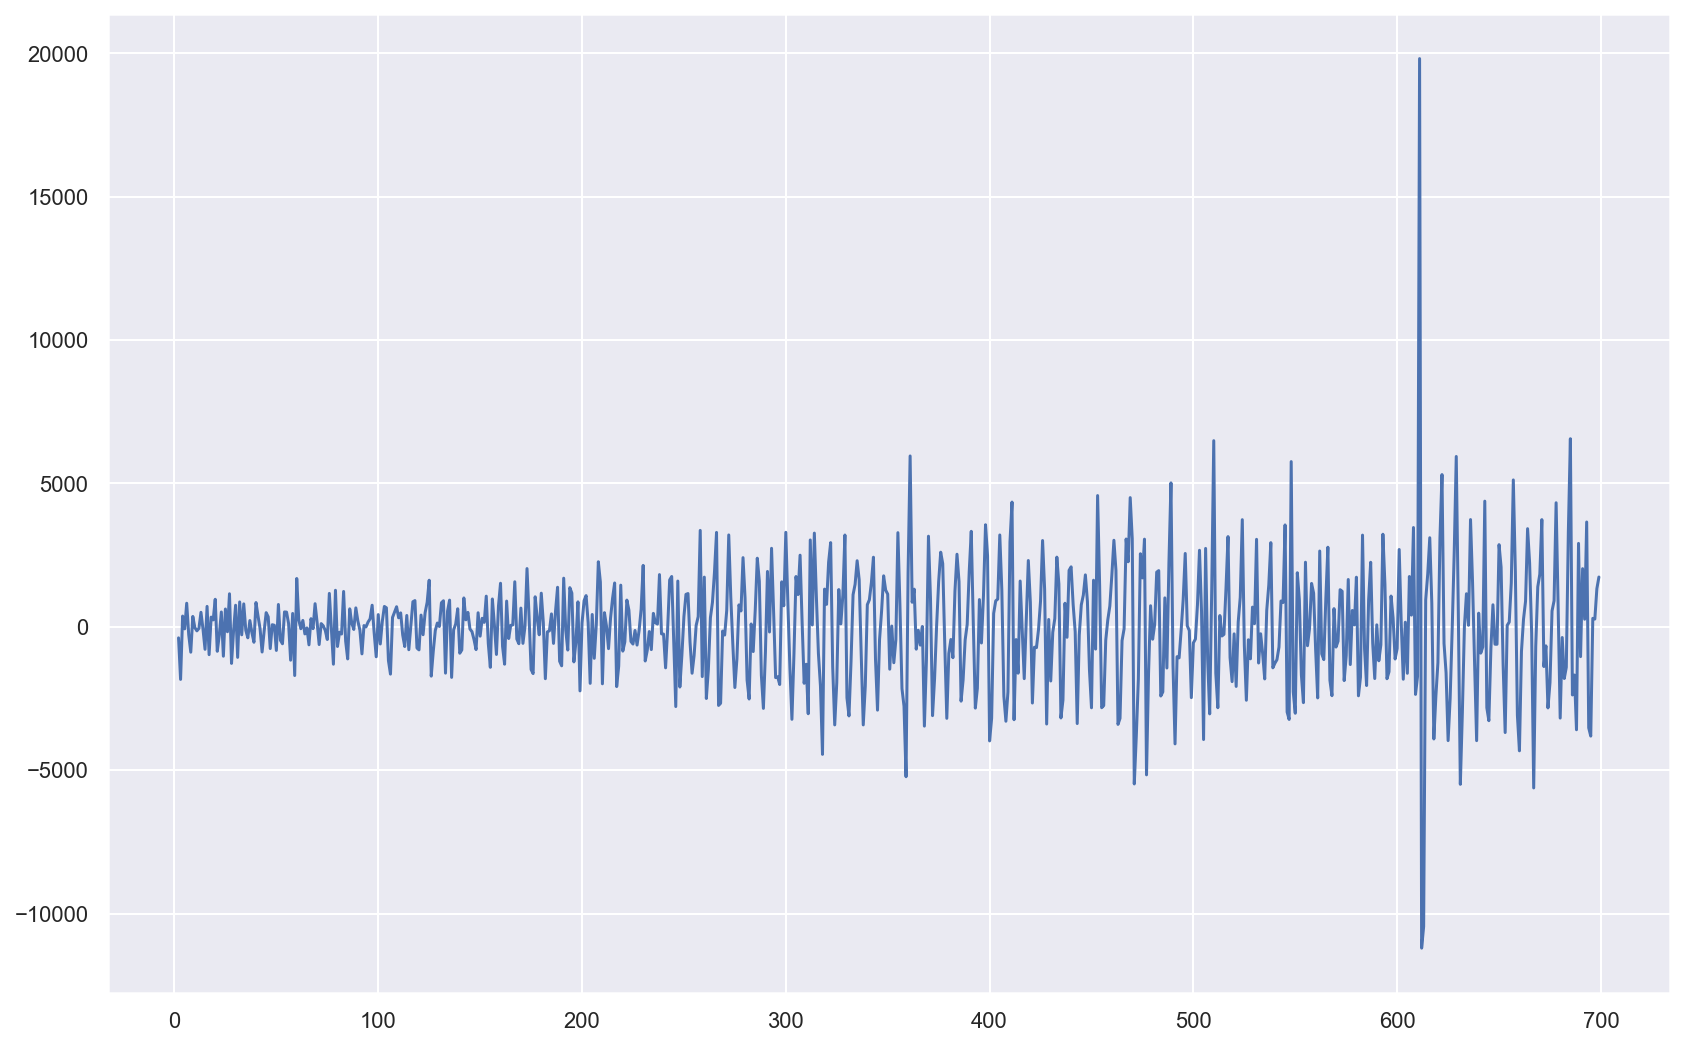

In [293]:
plt.plot(raw_reg["count"][1:], diff1_new_y)
plt.show()

ADF Test shows 'can reject the null hypothesis'. It means "stationary".

In [240]:
stationarity_adf_test(diff1_new_y, [])

,Stationarity_adf
Test Statistics,-8.314932e+00
p-value,3.702688e-13
Used Lag,1.900000e+01
Used Observations,6.780000e+02
Critical Value(1%),-3.440032e+00
Maximum Information Criteria,1.181903e+04


KPSS Test shows 'cannot reject the null hypothesis'. It means "**stationary**". 

In [241]:
stationarity_kpss_test(new_y, [])

,Stationarity_kpss
Test Statistics,0.354332
p-value,0.096839
Used Lag,9.000000
Critical Value(10%),0.347000


## We can conclude that after difference 1, the data will become stationary. 
- Before making model, we can check what is the optimal differnece with pmdarima package. 

In [256]:
!pip3 install pmdarima

     |████████████████████████████████| 595 kB 2.2 MB/s eta 0:00:01


In [257]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [268]:
Y_data = pd.DataFrame(new_y)
Y_data.columns = ["resid"]

In [273]:
Y_data.head()

,resid
date,
2017-01-01,2528.445870
2017-01-02,2142.570658
2017-01-03,307.695447
2017-01-04,681.820236
2017-01-05,608.945025


<AxesSubplot:xlabel='date'>

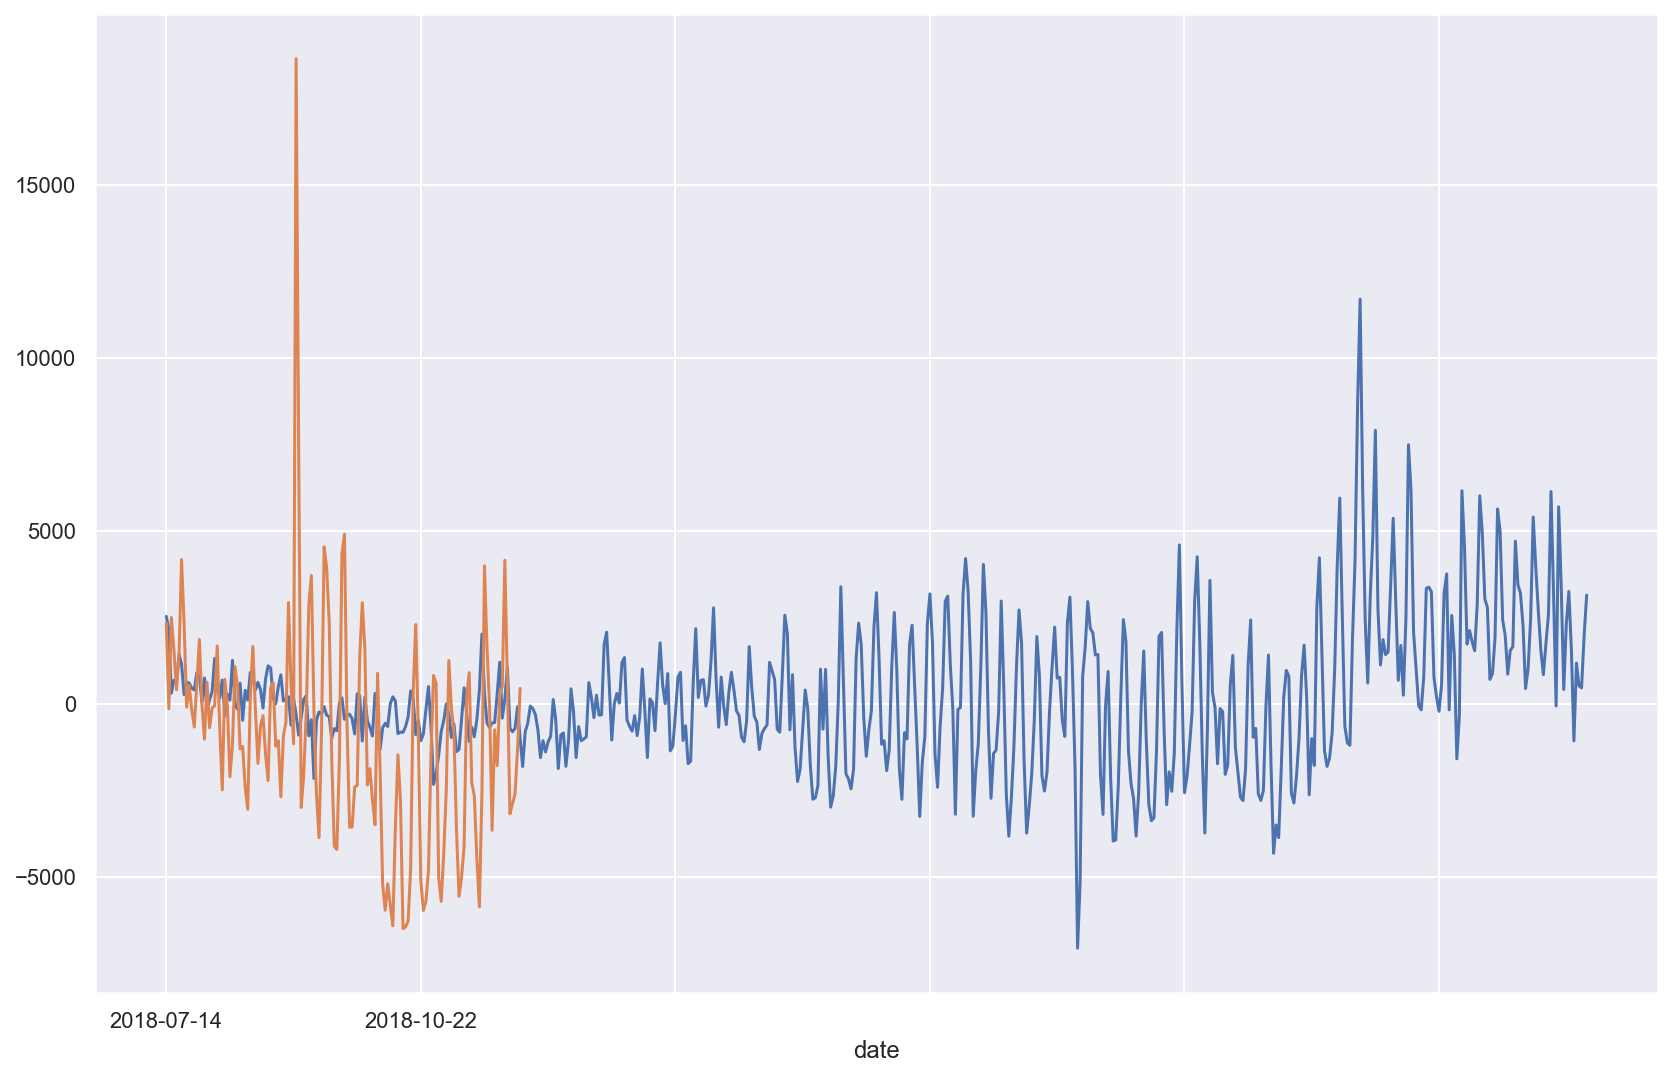

In [276]:
y_train = Y_data['resid'][:int(0.8*len(Y_data))]
y_test = Y_data['resid'][int(0.8*len(Y_data)):]
y_train.plot()
y_test.plot()

In [278]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Check the optimal diff d = {n_diffs}")

Check the diff d = 1


In [279]:
model = pm.auto_arima(y = y_train    
                      , d = 1        
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False 
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9878.045, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9869.062, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9855.777, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9876.046, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9844.535, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9617.118, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9799.730, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9605.405, Time=0.63 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9769.653, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9579.890, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9577.866, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9668.628, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9542.421, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : 

ARIMA(2, 1, 3) seems the best model

### Residual Check

In [281]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  559
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -4764.833
Date:                Sun, 12 Dec 2021   AIC                           9541.666
Time:                        03:28:14   BIC                           9567.612
Sample:                             0   HQIC                          9551.799
                                - 559                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2399      0.006    220.867      0.000       1.229       1.251
ar.L2         -0.9916      0.005   -184.497      0.000      -1.002      -0.981
ma.L1         -1.8916      0.025    -76.619      0.0

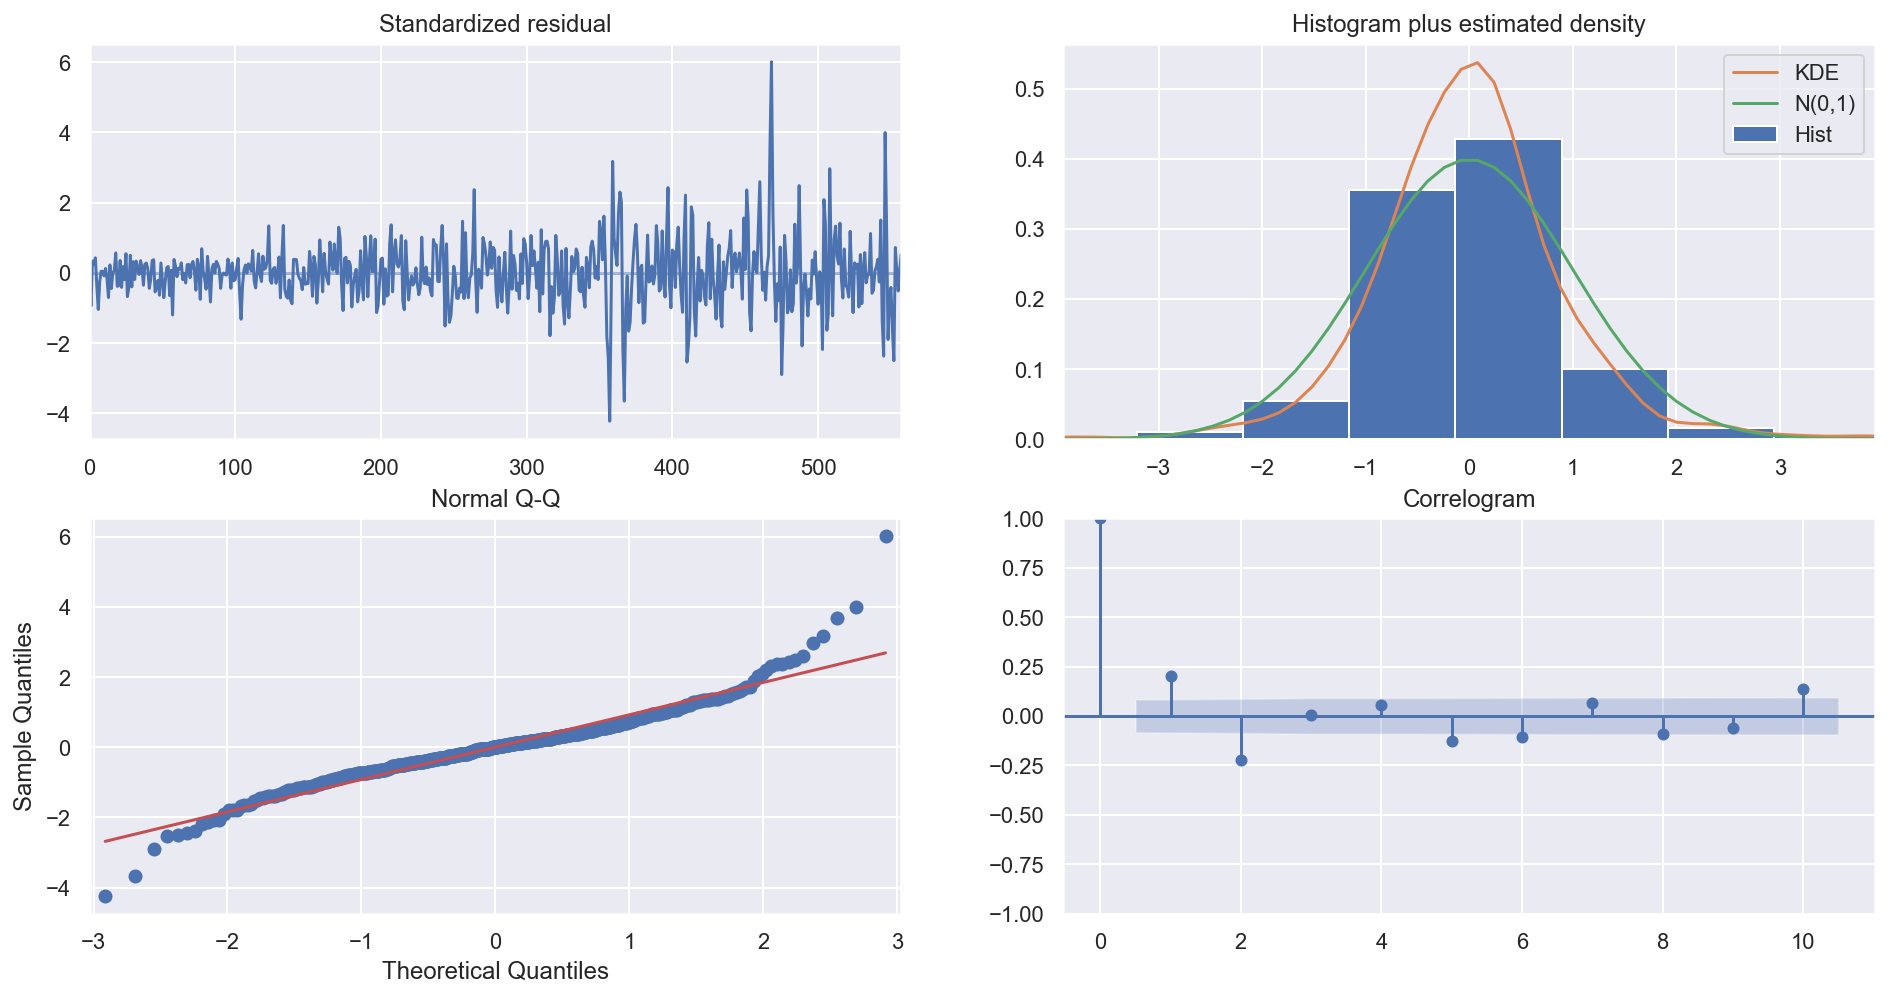

In [282]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

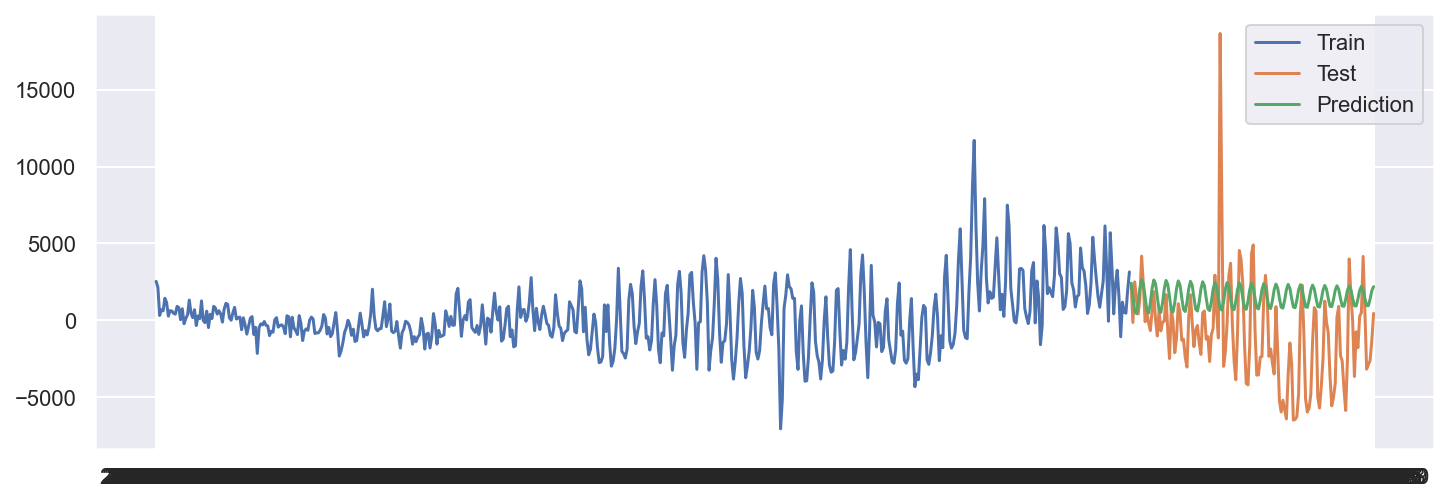

In [283]:
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# Graph
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # Train Data
plt.plot(y_test, label='Test')          # Test Data
plt.plot(y_predict, label='Prediction')  # Predicted Data
plt.legend()
plt.show()

# Conclusion

- Out prediction should be 
- Linear Model + ARIMA(2, 1, 3)
- **41.2305`*`Day Count After 2017/1/1  + 5384.4191 + ARIMA(2, 1, 3)**

### Additional

In [284]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # By One Step 
        , return_conf_int=True)              # 
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [285]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## mModel Update
    model.update(new_ob)

In [286]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
date,,
2018-07-14,2334.202774,2419.223617
2018-07-15,-146.672438,1469.852036
2018-07-16,2495.452351,23.302007
2018-07-17,1549.577140,826.295535
2018-07-18,405.701928,1713.808163
...,...,...
2018-11-26,-3183.950747,-1513.391287
2018-11-27,-2889.825958,-3464.798357
2018-11-28,-2619.701170,-2466.718256


In [287]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  699
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6150.522
Date:                Sun, 12 Dec 2021   AIC                          12313.044
Time:                        03:30:35   BIC                          12340.334
Sample:                             0   HQIC                         12323.595
                                - 699                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2388      0.005    273.423      0.000       1.230       1.248
ar.L2         -0.9916      0.005   -217.534      0.000      -1.000      -0.983
ma.L1         -1.9228      0.014   -142.225      0.0

In [290]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # Train Data-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # Test Data------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # Prediction -----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # Confidence Interval ---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] 
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(2,1,3)Model ")
fig.show()

### Model Evaluation

In [291]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")
# MAPE: 0.792

MAPE: 222.746
